## 1.Cel zadania domowego
Celem zadania domowego było zaimplementowanie poprawienia wadliwej wizualizacji danych z Pracy Domowej 2 z użyciem pakietu seaborn lub matplotlib.


## 2. Wybrana wizualizacja
Do zadania wybrano wykres ze strony: https://www.rp.pl/Budownictwo/303219941-Mamy-zatrzymac-budowy-niezgodne-z-prawem-UE.html.

![wizualizacja](https://grafik.rp.pl/grafika2/1563981,9.jpg)

Powyższy zestaw 3 wykresów słupkowych ma kilka znaczących problemów, które utrudniają intuicyjne zrozumienie prezentowanych informacji.
Przede wszystkim wykresy te opisują różne przedziały czasu, i przedstawiane wartości dla tego samego roku nie występują koło siebie.
Ponadto na środkowym wykresie użyto wykresu słupkowego z zaokrąglonymi krawędziami
 do porównania podobnych wartości, co utrudnia zauważenie zmiany między kolejnymi latami.
 Natomiast długość dróg ekspresowych nie została w żaden sposób zaprezentowana graficznie, zostały tylko wypisane wartości dla kolejnych lat.
Co więcej pierwszy wykres przedstawia bardzo podobne informacje co drugi:
 np jeśli dodamy informacje o długości pozostałych dróg do drugiego wykresu, pierwszy wykres będzie przedstawiał tylko przyrost
z wartości na drugim wykresie, bez podzialu na poszczególne rodzaje dróg.
Na koniec zaznaczenie na ciemniejszy kolor słupków o największej wartości nie wnosi nic nowego, a w przypadku 
danych które stale rosną (wykres drugi) jest kompletnie bez sensu.

## 3. Propozycja poprawionej wizualizacji

Korzystamy z nastepujących pakietów:

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

Dane zebrano z oficjalnej strony GDDKiA i umieszczono je w tabeli danych.

In [2]:
rok_label=[str(2012 + i) for i in range(10)]
rok_label[9]='2021*'
d={'rok': [2012 + i for i in range(10)],\
    'autostrady': [296.6,125.1,76.3,20.8,81,0,0,57.7,18.3,39.6],\
    'ekspresowe': [343,151,215.8,34.9,43.8,273.4,323.0,373.6,104.8,308.2],\
    'krajowe': [20.4,107.9,40.4,32.3,12.4,64,17.1,28.6,14.6,37.7],\
    'wydatki': [22.4,13.4,10,12,16.1,16.6,15.3,13.8,18.3,19.3]}
df=pd.DataFrame(data=d)

Ze wzgledu na brak wczesniejszych danych jako przedział czasu wybrałem lata 2012-2021. Wykresy całkowitej
długosci dróg danego rodzaju oraz rocznej oddanej długosci dróg zostały zastapiona roczna długoscia oddanych
dróg z podziałem na typy, co łaczy prawie wszystkie informacje zawarte w obu tych wykresach. Wykres
oddanych dróg i wydatków, znajduja sie jeden pod drugim co umozliwia szybkie porównanie wartosci obu w
danym roku. Informacja w którym roku badane wartosci były najwieksze została usunieta, gdyz nie wnosi
ona nowych informacji, od razu widoczna jest wartosc maksymalna na obu wykresach.  
Podsumowujac ponizsza wizualizacja jest czytelniejsza i stanowi ułatwienie w ewentualnej dalszej interpretacji
danych.

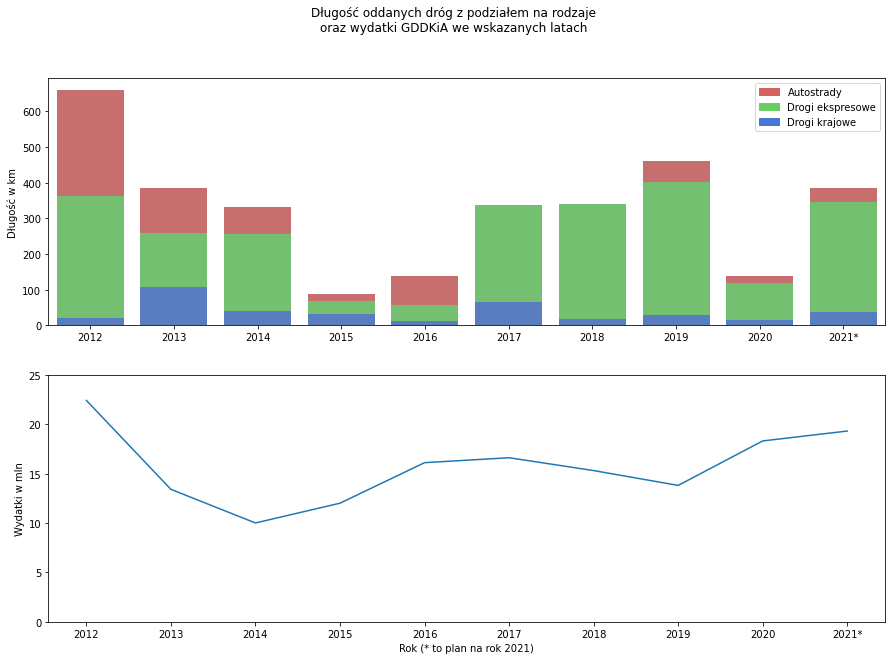

In [3]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10)) # tworzymy wykres skłądaący sie z dwóch podwykresów
fig.suptitle('Długość oddanych dróg z podziałem na rodzaje\noraz wydatki GDDKiA we wskazanych latach')

# kolumny się na siebie nakładają, więc żeby otrzymać interesujący nas wykres musimy dodać wysokości dla kolejnych kolumn
df['ekspresowe_cum']=df['ekspresowe']+df['krajowe']
df['autostrady_cum']=df['ekspresowe_cum']+df['autostrady']

palette=sns.color_palette('muted')
bar1 = sns.barplot(ax=axes[0], data=df,x="rok",  y="autostrady_cum",  color=palette[3])
bar2 = sns.barplot(ax=axes[0], data=df,x="rok",  y="ekspresowe_cum",  color=palette[2])
bar3 = sns.barplot(ax=axes[0], data=df,x="rok",  y="krajowe",  color=palette[0])

#dodajemy legendę
label1 = mpatches.Patch(color=palette[3], label='Autostrady')
label2 = mpatches.Patch(color=palette[2], label='Drogi ekspresowe')
label3 = mpatches.Patch(color=palette[0], label='Drogi krajowe')
axes[0].legend(handles=[label1, label2, label3])

#ustawiamy nazwy osi i etykiety na  osi x
axes[0].set(xlabel=None, ylabel='Długość w km')
axes[0].set_xticklabels(rok_label)

sns.lineplot(ax=axes[1],data=d,x='rok',y='wydatki')
axes[1].set(xlabel='Rok (* to plan na rok 2021)', ylabel='Wydatki w mln')
axes[1].set_xticks(d['rok'])
axes[1].set_xticklabels(rok_label)
axes[1].set(ylim=(0, 25))

plt.show()